In [2]:
import torch
from torch import nn, Tensor
from torch.utils.data import Dataset, DataLoader
import numpy as np
from data_loader import tokenize, WordDataset
from transformer import Model
import time 
from datetime import datetime
from tqdm import tqdm
import os
import random

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
training_file = '/home/aneeshs/PythonScripts/hangman_blue/words_250000_train.txt'
training_dataset = WordDataset(training_file, 16, device)

In [4]:
torch.set_float32_matmul_precision('high')
model = Model().to(device)
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
train_dataloader = DataLoader(training_dataset, batch_size=2048)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = None
loss_func = nn.KLDivLoss(reduction='batchmean')

In [7]:
def train(model, num_epochs, scheduler=None):
    model.train()
    now = datetime.now(); dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
    log_file = 'training_loss.txt'
    with open(log_file, 'w') as f:
        f.write(f'{dt_string}\n')
        f.write(f'dataset length = {training_dataset.__len__()}, num_model_params = {num_params}, num_epochs = {num_epochs} \n')
        f.write(f'num_batches = {len(train_dataloader)}\n')
        f.write('Training Loss\n')
    os.system(f'cat {log_file}')
    training_loss = np.empty(num_epochs)
    for epoch in range(num_epochs):
        start = time.time()
        epoch_loss = torch.empty(len(train_dataloader))
        for batch_idx, (inputs, labels) in tqdm(enumerate(train_dataloader)):
            optimizer.zero_grad()
            predictions = model(inputs)
            loss = loss_func(predictions, labels)
            if torch.any(torch.isnan(loss)):
                print(f'epoch {epoch}, batch {batch_idx}, loss = {loss}')
                print(f'inputs = {inputs}')
                print(f'labels = {labels}, sum = {labels.sum(dim=1)}')
                print(f'predictions = {torch.exp(predictions)}, sum = {torch.exp(predictions).sum(dim=1)}')
                print(f'loss = {loss}')
                raise ValueError('loss is nan')
            # print(batch_idx, loss)
            loss.backward()
            optimizer.step()
            epoch_loss[batch_idx] = loss.detach().item()
            # print(f'epoch {epoch}, batch {batch_idx}, loss = {loss}')
            if scheduler is not None:
                scheduler.step()
        training_loss[epoch] = epoch_loss.mean()
        end = time.time()
        string = f'epoch {epoch} {training_loss[epoch]} [{end-start} s]\n'
        with open(log_file, 'a') as f:
            f.write(string)
        print(string)
        if epoch%20 == 0:
                torch.save(model, f'model_{epoch}.pth')

In [8]:
print(scheduler)
train(model, 500, scheduler)
torch.save(model,'model_500.pth')

None
22/03/2024 14:24:22
dataset length = 223786, num_model_params = 1868058, num_epochs = 200 
num_batches = 110
Training Loss


110it [00:40,  2.74it/s]


epoch 0 1.2712924480438232 [40.11454105377197 s]



110it [00:40,  2.75it/s]


epoch 1 1.269492506980896 [40.067471981048584 s]



110it [00:40,  2.72it/s]


epoch 2 1.2685405015945435 [40.389827728271484 s]



110it [00:41,  2.63it/s]


epoch 3 1.2682933807373047 [41.76947355270386 s]



110it [00:42,  2.62it/s]


epoch 4 1.2672783136367798 [42.0658745765686 s]



110it [00:40,  2.72it/s]


epoch 5 1.267103910446167 [40.40488243103027 s]



110it [00:41,  2.68it/s]


epoch 6 1.2674897909164429 [41.090601682662964 s]



110it [00:42,  2.61it/s]


epoch 7 1.2681434154510498 [42.1051504611969 s]



110it [00:41,  2.62it/s]


epoch 8 1.2665221691131592 [41.963252544403076 s]



110it [00:42,  2.62it/s]


epoch 9 1.2684599161148071 [42.03202199935913 s]



110it [00:41,  2.63it/s]


epoch 10 1.2659419775009155 [41.88531684875488 s]



110it [00:41,  2.63it/s]


epoch 11 1.2642003297805786 [41.809749603271484 s]



110it [00:41,  2.63it/s]


epoch 12 1.2670375108718872 [41.7543740272522 s]



110it [00:41,  2.63it/s]


epoch 13 1.2659510374069214 [41.90483021736145 s]



110it [00:41,  2.63it/s]


epoch 14 1.2658206224441528 [41.80790090560913 s]



110it [00:41,  2.62it/s]


epoch 15 1.2665588855743408 [41.92104148864746 s]



110it [00:42,  2.62it/s]


epoch 16 1.2662830352783203 [42.01879668235779 s]



110it [00:42,  2.62it/s]


epoch 17 1.267302393913269 [42.0530571937561 s]



110it [00:42,  2.61it/s]


epoch 18 1.2632969617843628 [42.162469148635864 s]



110it [00:42,  2.62it/s]


epoch 19 1.2654696702957153 [42.01036262512207 s]



110it [00:41,  2.62it/s]


epoch 20 1.2643861770629883 [42.00399994850159 s]



110it [00:40,  2.69it/s]


epoch 21 1.2652620077133179 [40.90374684333801 s]



110it [00:40,  2.75it/s]


epoch 22 1.2635529041290283 [40.02758765220642 s]



110it [00:39,  2.76it/s]


epoch 23 1.263759970664978 [39.931095123291016 s]



110it [00:40,  2.74it/s]


epoch 24 1.2646842002868652 [40.12562918663025 s]



110it [00:40,  2.75it/s]


epoch 25 1.263879656791687 [40.031492710113525 s]



110it [00:39,  2.75it/s]


epoch 26 1.261742353439331 [39.978710651397705 s]



110it [00:39,  2.75it/s]


epoch 27 1.2621052265167236 [40.00028109550476 s]



110it [00:40,  2.74it/s]


epoch 28 1.2622299194335938 [40.08684992790222 s]



110it [00:40,  2.74it/s]


epoch 29 1.2631908655166626 [40.08971619606018 s]



110it [00:40,  2.74it/s]


epoch 30 1.2632914781570435 [40.07824087142944 s]



110it [00:40,  2.74it/s]


epoch 31 1.262107014656067 [40.08907079696655 s]



110it [00:40,  2.75it/s]


epoch 32 1.262954592704773 [40.063621282577515 s]



110it [00:39,  2.75it/s]


epoch 33 1.2589201927185059 [40.00003099441528 s]



110it [00:39,  2.75it/s]


epoch 34 1.2593293190002441 [39.974281549453735 s]



110it [00:40,  2.75it/s]


epoch 35 1.261031985282898 [40.02568960189819 s]



110it [00:39,  2.75it/s]


epoch 36 1.2607263326644897 [39.997562885284424 s]



110it [00:40,  2.74it/s]


epoch 37 1.2631182670593262 [40.14944577217102 s]



110it [00:40,  2.75it/s]


epoch 38 1.2583409547805786 [40.012332916259766 s]



110it [00:40,  2.75it/s]


epoch 39 1.2607135772705078 [40.049784421920776 s]



110it [00:39,  2.75it/s]


epoch 40 1.2582453489303589 [39.965248584747314 s]



110it [00:40,  2.74it/s]


epoch 41 1.2591499090194702 [40.14531922340393 s]



110it [00:40,  2.75it/s]


epoch 42 1.2576011419296265 [40.03062033653259 s]



110it [00:40,  2.74it/s]


epoch 43 1.2607306241989136 [40.103578090667725 s]



110it [00:41,  2.64it/s]


epoch 44 1.2599856853485107 [41.60127282142639 s]



110it [00:41,  2.62it/s]


epoch 45 1.2595497369766235 [41.947386264801025 s]



110it [00:41,  2.63it/s]


epoch 46 1.2565456628799438 [41.82877993583679 s]



110it [00:41,  2.63it/s]


epoch 47 1.2605940103530884 [41.84646415710449 s]



110it [00:41,  2.63it/s]


epoch 48 1.2569857835769653 [41.898438453674316 s]



110it [00:41,  2.62it/s]


epoch 49 1.258163332939148 [41.97068119049072 s]



110it [00:42,  2.61it/s]


epoch 50 1.259183406829834 [42.087990045547485 s]



110it [00:41,  2.63it/s]


epoch 51 1.2595155239105225 [41.86192584037781 s]



110it [00:41,  2.64it/s]


epoch 52 1.2584232091903687 [41.705315589904785 s]



110it [00:41,  2.63it/s]


epoch 53 1.2577170133590698 [41.76289081573486 s]



110it [00:41,  2.64it/s]


epoch 54 1.2558902502059937 [41.68790578842163 s]



110it [00:41,  2.64it/s]


epoch 55 1.2594655752182007 [41.68445634841919 s]



110it [00:41,  2.62it/s]


epoch 56 1.2573902606964111 [41.950713872909546 s]



110it [00:41,  2.63it/s]


epoch 57 1.257260799407959 [41.88954710960388 s]



110it [00:41,  2.63it/s]


epoch 58 1.2589915990829468 [41.8709557056427 s]



110it [00:41,  2.63it/s]


epoch 59 1.2529135942459106 [41.797297954559326 s]



110it [00:41,  2.62it/s]


epoch 60 1.2562265396118164 [42.00098705291748 s]



110it [00:41,  2.63it/s]


epoch 61 1.256352186203003 [41.8861722946167 s]



110it [00:42,  2.61it/s]


epoch 62 1.255018949508667 [42.112952709198 s]



110it [00:42,  2.61it/s]


epoch 63 1.2541667222976685 [42.09367537498474 s]



110it [00:41,  2.62it/s]


epoch 64 1.2562083005905151 [41.92965364456177 s]



110it [00:41,  2.62it/s]


epoch 65 1.254040002822876 [41.932175397872925 s]



110it [00:42,  2.61it/s]


epoch 66 1.252869725227356 [42.09277081489563 s]



110it [00:41,  2.63it/s]


epoch 67 1.253485918045044 [41.88904857635498 s]



110it [00:41,  2.64it/s]


epoch 68 1.2551379203796387 [41.71384835243225 s]



110it [00:41,  2.62it/s]


epoch 69 1.2535309791564941 [41.92212128639221 s]



110it [00:41,  2.63it/s]


epoch 70 1.2535152435302734 [41.90645885467529 s]



110it [00:41,  2.63it/s]


epoch 71 1.253292202949524 [41.86924910545349 s]



110it [00:41,  2.63it/s]


epoch 72 1.2547805309295654 [41.852375984191895 s]



110it [00:41,  2.63it/s]


epoch 73 1.2526928186416626 [41.85031867027283 s]



110it [00:42,  2.61it/s]


epoch 74 1.2547889947891235 [42.07919454574585 s]



110it [00:41,  2.63it/s]


epoch 75 1.252413272857666 [41.849045515060425 s]



110it [00:41,  2.62it/s]


epoch 76 1.2530517578125 [41.95537304878235 s]



110it [00:41,  2.62it/s]


epoch 77 1.2518349885940552 [41.96628165245056 s]



110it [00:41,  2.63it/s]


epoch 78 1.2518978118896484 [41.891175270080566 s]



110it [00:41,  2.62it/s]


epoch 79 1.2528183460235596 [41.92238259315491 s]



110it [00:41,  2.63it/s]


epoch 80 1.250079870223999 [41.857308864593506 s]



110it [00:41,  2.65it/s]


epoch 81 1.2504256963729858 [41.552852630615234 s]



110it [00:40,  2.74it/s]


epoch 82 1.253401517868042 [40.14464282989502 s]



110it [00:39,  2.75it/s]


epoch 83 1.2527884244918823 [39.99634408950806 s]



110it [00:40,  2.75it/s]


epoch 84 1.2504421472549438 [40.052730321884155 s]



110it [00:40,  2.74it/s]


epoch 85 1.2499407529830933 [40.12813210487366 s]



110it [00:39,  2.75it/s]


epoch 86 1.2511471509933472 [40.003113985061646 s]



110it [00:40,  2.74it/s]


epoch 87 1.2502368688583374 [40.128899812698364 s]



110it [00:39,  2.75it/s]


epoch 88 1.2524898052215576 [39.99440789222717 s]



110it [00:39,  2.75it/s]


epoch 89 1.2525875568389893 [39.9994056224823 s]



110it [00:39,  2.75it/s]


epoch 90 1.250677227973938 [39.9605667591095 s]



110it [00:40,  2.75it/s]


epoch 91 1.2491422891616821 [40.02979922294617 s]



110it [00:40,  2.75it/s]


epoch 92 1.2485017776489258 [40.070544481277466 s]



110it [00:40,  2.74it/s]


epoch 93 1.249832034111023 [40.16231632232666 s]



110it [00:40,  2.75it/s]


epoch 94 1.2490041255950928 [40.02201747894287 s]



110it [00:40,  2.75it/s]


epoch 95 1.24892258644104 [40.00609540939331 s]



110it [00:40,  2.75it/s]


epoch 96 1.2477444410324097 [40.03469753265381 s]



110it [00:40,  2.75it/s]


epoch 97 1.2498530149459839 [40.021119356155396 s]



110it [00:40,  2.75it/s]


epoch 98 1.2478259801864624 [40.0265429019928 s]



110it [00:40,  2.75it/s]


epoch 99 1.248173713684082 [40.07007169723511 s]



110it [00:40,  2.74it/s]


epoch 100 1.2465566396713257 [40.14521050453186 s]



110it [00:48,  2.29it/s]


epoch 101 1.2476212978363037 [48.10138988494873 s]



110it [01:17,  1.42it/s]


epoch 102 1.24785578250885 [77.55965447425842 s]



110it [01:17,  1.42it/s]


epoch 103 1.248138189315796 [77.61716198921204 s]



110it [00:55,  1.97it/s]


epoch 104 1.2503290176391602 [55.74471139907837 s]



110it [00:40,  2.74it/s]


epoch 105 1.247862696647644 [40.203436851501465 s]



110it [00:40,  2.74it/s]


epoch 106 1.2475782632827759 [40.14553952217102 s]



110it [00:39,  2.75it/s]


epoch 107 1.2469431161880493 [39.95379400253296 s]



110it [00:40,  2.74it/s]


epoch 108 1.2460347414016724 [40.07809638977051 s]



110it [00:39,  2.75it/s]


epoch 109 1.245458722114563 [39.96518421173096 s]



110it [00:40,  2.74it/s]


epoch 110 1.246517539024353 [40.10915923118591 s]



110it [00:40,  2.75it/s]


epoch 111 1.2468652725219727 [40.047158002853394 s]



110it [00:39,  2.75it/s]


epoch 112 1.248409390449524 [39.96751070022583 s]



110it [00:40,  2.75it/s]


epoch 113 1.2457791566848755 [40.05803847312927 s]



110it [00:40,  2.75it/s]


epoch 114 1.2458401918411255 [40.030908823013306 s]



110it [00:39,  2.75it/s]


epoch 115 1.245782494544983 [39.9500675201416 s]



110it [00:40,  2.74it/s]


epoch 116 1.2456392049789429 [40.12352132797241 s]



110it [00:40,  2.75it/s]


epoch 117 1.2464598417282104 [40.03539490699768 s]



110it [00:40,  2.74it/s]


epoch 118 1.2442638874053955 [40.21329855918884 s]



110it [00:40,  2.74it/s]


epoch 119 1.2453840970993042 [40.097864627838135 s]



110it [00:40,  2.74it/s]


epoch 120 1.2428139448165894 [40.147682189941406 s]



110it [00:40,  2.74it/s]


epoch 121 1.246695876121521 [40.08681297302246 s]



110it [00:40,  2.75it/s]


epoch 122 1.243385672569275 [40.0262930393219 s]



110it [00:40,  2.74it/s]


epoch 123 1.245561957359314 [40.11527895927429 s]



110it [00:40,  2.75it/s]


epoch 124 1.2438650131225586 [40.041725397109985 s]



110it [00:40,  2.74it/s]


epoch 125 1.243466854095459 [40.21276593208313 s]



110it [00:40,  2.74it/s]


epoch 126 1.2462807893753052 [40.08399295806885 s]



110it [00:40,  2.75it/s]


epoch 127 1.242940068244934 [40.07020139694214 s]



110it [00:40,  2.74it/s]


epoch 128 1.2425527572631836 [40.207677364349365 s]



110it [00:40,  2.75it/s]


epoch 129 1.2435237169265747 [40.04604959487915 s]



110it [00:40,  2.75it/s]


epoch 130 1.2435723543167114 [40.05231690406799 s]



110it [00:40,  2.74it/s]


epoch 131 1.2450954914093018 [40.08839225769043 s]



110it [00:40,  2.74it/s]


epoch 132 1.2431285381317139 [40.20060110092163 s]



110it [00:40,  2.75it/s]


epoch 133 1.241987705230713 [40.01296901702881 s]



110it [00:40,  2.75it/s]


epoch 134 1.2416189908981323 [40.00725054740906 s]



110it [00:39,  2.75it/s]


epoch 135 1.2443550825119019 [39.932658672332764 s]



110it [00:39,  2.75it/s]


epoch 136 1.2414129972457886 [39.942588090896606 s]



110it [00:39,  2.75it/s]


epoch 137 1.2420568466186523 [39.93942308425903 s]



110it [00:40,  2.74it/s]


epoch 138 1.2415382862091064 [40.19696116447449 s]



110it [00:40,  2.75it/s]


epoch 139 1.242102861404419 [40.00762867927551 s]



110it [00:39,  2.75it/s]


epoch 140 1.2405956983566284 [39.94475984573364 s]



110it [00:39,  2.75it/s]


epoch 141 1.2437113523483276 [39.954185009002686 s]



110it [00:40,  2.75it/s]


epoch 142 1.2405047416687012 [40.01859259605408 s]



110it [00:39,  2.75it/s]


epoch 143 1.2393724918365479 [39.93394875526428 s]



110it [00:39,  2.75it/s]


epoch 144 1.2396373748779297 [39.962730407714844 s]



110it [00:40,  2.74it/s]


epoch 145 1.2402732372283936 [40.16248059272766 s]



110it [00:39,  2.75it/s]


epoch 146 1.2421386241912842 [39.937119007110596 s]



110it [00:39,  2.76it/s]


epoch 147 1.2401727437973022 [39.92083716392517 s]



110it [00:39,  2.76it/s]


epoch 148 1.2382338047027588 [39.9210786819458 s]



110it [00:40,  2.75it/s]


epoch 149 1.2422188520431519 [40.01404070854187 s]



110it [00:39,  2.75it/s]


epoch 150 1.2397478818893433 [39.95606827735901 s]



110it [00:40,  2.74it/s]


epoch 151 1.2400543689727783 [40.127952098846436 s]



110it [00:40,  2.75it/s]


epoch 152 1.239446759223938 [40.037248849868774 s]



110it [00:40,  2.75it/s]


epoch 153 1.2388008832931519 [40.05780792236328 s]



110it [00:39,  2.75it/s]


epoch 154 1.2396098375320435 [39.980862855911255 s]



110it [00:39,  2.76it/s]


epoch 155 1.2405987977981567 [39.925822496414185 s]



110it [00:39,  2.75it/s]


epoch 156 1.2386891841888428 [39.97176718711853 s]



110it [00:40,  2.74it/s]


epoch 157 1.2374565601348877 [40.10278582572937 s]



110it [00:39,  2.75it/s]


epoch 158 1.2384796142578125 [39.97750759124756 s]



110it [00:40,  2.75it/s]


epoch 159 1.2389447689056396 [40.01293587684631 s]



110it [00:39,  2.75it/s]


epoch 160 1.2385659217834473 [39.9693500995636 s]



110it [00:40,  2.74it/s]


epoch 161 1.237463355064392 [40.10755443572998 s]



110it [00:40,  2.75it/s]


epoch 162 1.2394388914108276 [40.03427243232727 s]



110it [00:40,  2.74it/s]


epoch 163 1.2389999628067017 [40.17098569869995 s]



110it [00:40,  2.74it/s]


epoch 164 1.237052083015442 [40.10131239891052 s]



110it [00:40,  2.75it/s]


epoch 165 1.2376134395599365 [40.03233051300049 s]



110it [00:40,  2.74it/s]


epoch 166 1.2383567094802856 [40.08149528503418 s]



110it [00:40,  2.75it/s]


epoch 167 1.2361633777618408 [40.055859327316284 s]



110it [00:40,  2.74it/s]


epoch 168 1.2379957437515259 [40.11169719696045 s]



110it [00:40,  2.75it/s]


epoch 169 1.2377227544784546 [40.07171416282654 s]



110it [00:40,  2.73it/s]


epoch 170 1.2375869750976562 [40.26954174041748 s]



110it [00:40,  2.75it/s]


epoch 171 1.2375084161758423 [40.00707721710205 s]



110it [00:40,  2.75it/s]


epoch 172 1.236445665359497 [40.062949419021606 s]



110it [00:40,  2.75it/s]


epoch 173 1.2367111444473267 [40.024407148361206 s]



110it [00:39,  2.75it/s]


epoch 174 1.2369019985198975 [40.00259780883789 s]



110it [00:39,  2.75it/s]


epoch 175 1.235446810722351 [39.99578905105591 s]



110it [00:40,  2.73it/s]


epoch 176 1.2373478412628174 [40.231502294540405 s]



110it [00:39,  2.75it/s]


epoch 177 1.2380805015563965 [40.00240898132324 s]



110it [00:40,  2.74it/s]


epoch 178 1.237410306930542 [40.105818033218384 s]



110it [00:40,  2.75it/s]


epoch 179 1.2346199750900269 [40.07266879081726 s]



110it [00:40,  2.74it/s]


epoch 180 1.235870361328125 [40.096304178237915 s]



110it [00:40,  2.75it/s]


epoch 181 1.235474705696106 [40.052844762802124 s]



110it [00:40,  2.75it/s]


epoch 182 1.2373605966567993 [40.06662917137146 s]



110it [00:40,  2.73it/s]


epoch 183 1.2345658540725708 [40.32364106178284 s]



110it [00:40,  2.73it/s]


epoch 184 1.234149694442749 [40.22509741783142 s]



110it [00:40,  2.74it/s]


epoch 185 1.2354309558868408 [40.19109582901001 s]



110it [00:40,  2.74it/s]


epoch 186 1.2340317964553833 [40.20313477516174 s]



110it [00:40,  2.74it/s]


epoch 187 1.2363414764404297 [40.17240381240845 s]



110it [00:40,  2.74it/s]


epoch 188 1.234721064567566 [40.21737742424011 s]



110it [00:40,  2.74it/s]


epoch 189 1.2340534925460815 [40.11007618904114 s]



110it [00:40,  2.74it/s]


epoch 190 1.2353636026382446 [40.130502462387085 s]



110it [00:40,  2.74it/s]


epoch 191 1.2338008880615234 [40.10350489616394 s]



110it [00:40,  2.75it/s]


epoch 192 1.2340084314346313 [40.03915572166443 s]



110it [00:39,  2.75it/s]


epoch 193 1.234528660774231 [39.98736882209778 s]



110it [00:40,  2.74it/s]


epoch 194 1.2347179651260376 [40.11928081512451 s]



110it [00:39,  2.75it/s]


epoch 195 1.2324490547180176 [39.98510670661926 s]



110it [00:40,  2.75it/s]


epoch 196 1.2350980043411255 [40.07663106918335 s]



110it [00:40,  2.74it/s]


epoch 197 1.2338778972625732 [40.12854480743408 s]



110it [00:40,  2.74it/s]


epoch 198 1.2330747842788696 [40.08467888832092 s]



110it [00:40,  2.75it/s]

epoch 199 1.2353941202163696 [40.02484726905823 s]



In [4]:
def get_probs(model,word):
    if len(word) > 16:
        if '#' in word[:16]:
            word = word[:16]
        else:
            word = word[-16:]
    input_sequence = torch.tensor([tokenize(word,16)])
    predictions = model(input_sequence)[0]
    return torch.exp(predictions)

In [5]:
def guess(model,word,guessed_letters):
    if len(word) > 16:
        if '#' in word[:16]:
            word = word[:16]
        else:
            word = word[-16:]
    input_sequence = torch.tensor([tokenize(word,16)])
    predictions = model(input_sequence)[0]
    for ltr in guessed_letters:
        predictions[ord(ltr) - ord('a')] = -np.inf
    predicted_index = torch.argmax(predictions)
    predicted_char = chr(predicted_index + ord('a'))
    return predicted_char

In [6]:
def play(model,word,verbose):
    input_word = '#'*len(word)
    num_tries = 6; guessed_letters = []
    if verbose: print("test word: ",word)
    if verbose: print("input    : ",input_word,"\n")
    while num_tries > 0:
        guess_letter = guess(model,input_word,guessed_letters)
        guessed_letters.append(guess_letter)
        if verbose: print("Guessing letter: ",guess_letter)
        if guess_letter in word:
            if verbose: print("Correct guess!")
            input_word = [word[i] if word[i] == guess_letter else input_word[i] for i in range(len(word))]
            input_word = "".join(input_word)
            # if verbose: print(input_word)
        else:
            if verbose: print("Incorrect guess!")
            num_tries -= 1
        if verbose: print("Current word: ",input_word)
        if verbose: print("Number of tries left: ",num_tries)
        if verbose: print("Guessed letters: ",guessed_letters)
        if verbose: print("\n")
        if "#" not in input_word:
            if verbose: print("You win!")
            # len_accuracy[len(test)].append(1)
            won = 1
            break
    if input_word != word:
        won = 0
        if verbose: print("You lose!")
        # len_accuracy[len(test)].append(0)
    if verbose: print(word,'----',input_word)
    return won

In [9]:
text_file = open(training_file,"r")
train_words = text_file.read().splitlines()
text_file.close()

In [8]:
model = torch.load('model_500.pth', map_location='cpu')
model.eval()

Model(
  (embedding_layer): Embedding(28, 64, padding_idx=0, max_norm=1)
  (positional_encoding): Positional_Encoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (classification_layer): ClassificationLayer(
    (layers): Sequential(
      (0): Linear(in_features=1024, out_features=512, bias=True)
      (1): Dropout(p=0.1, inplace=False)
      (2): GELU(approximate='none')
      (3): Linear(in_features=512, out_features=26, bias=True)
      (4): Dropout(p=0.1, inplace=False)
    )
  )
  (network_layers): Sequential(
    (0): Embedding(28, 64, padding_idx=0, max_norm=1)
    (1): Positional_Encoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (2): EncoderLayer(
      (0): ResConnect(
        (fn): Sequential(
          (0): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (1): MultiHeadAttention(
            (keys): Linear(in_features=64, out_features=64, bias=True)
            (queries): Linear(in_features=64, out_features=64, bias=True)
            (v

In [10]:
test_cases = random.sample(train_words,1000)

In [11]:
won = 0; fails = []; wins=[]
for word in test_cases:
    if play(model,word,0):
        won += 1
        wins.append(word)
    else:
        fails.append(word)
print('accuracy = ', won/len(test_cases))

accuracy =  0.599


In [12]:
import matplotlib.pyplot as plt

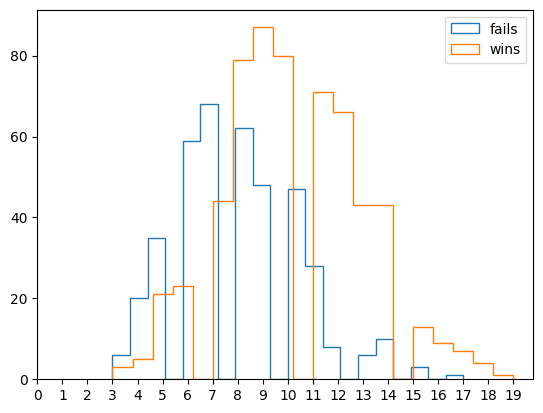

In [13]:
plt.hist([len(wrd) for wrd in fails], histtype='step',density=False,bins=20,label='fails')
plt.hist([len(wrd) for wrd in wins], histtype='step',density=False,bins=20,label='wins')
# plt.hist([len(wrd) for wrd in test_cases], histtype='step',density=True)
plt.xticks(range(20))
plt.legend()
plt.show()


In [14]:
play(model,'combinations',1)

test word:  combinations
input    :  ############ 

Guessing letter:  e
Incorrect guess!
Current word:  ############
Number of tries left:  5
Guessed letters:  ['e']


Guessing letter:  i
Correct guess!
Current word:  ####i###i###
Number of tries left:  5
Guessed letters:  ['e', 'i']


Guessing letter:  a
Correct guess!
Current word:  ####i#a#i###
Number of tries left:  5
Guessed letters:  ['e', 'i', 'a']


Guessing letter:  n
Correct guess!
Current word:  ####ina#i#n#
Number of tries left:  5
Guessed letters:  ['e', 'i', 'a', 'n']


Guessing letter:  o
Correct guess!
Current word:  #o##ina#ion#
Number of tries left:  5
Guessed letters:  ['e', 'i', 'a', 'n', 'o']


Guessing letter:  t
Correct guess!
Current word:  #o##ination#
Number of tries left:  5
Guessed letters:  ['e', 'i', 'a', 'n', 'o', 't']


Guessing letter:  m
Correct guess!
Current word:  #om#ination#
Number of tries left:  5
Guessed letters:  ['e', 'i', 'a', 'n', 'o', 't', 'm']


Guessing letter:  c
Correct guess!
Current 

1

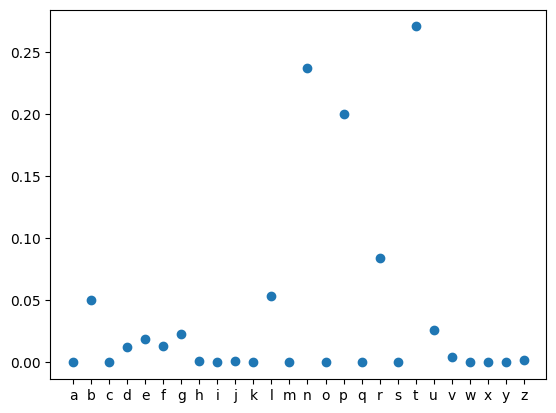

In [15]:
plt.scatter([chr(ord('a')+i) for i in range(26)],get_probs(model,'com#i#a#io#s').detach())